In [1]:
from extras.helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [2]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent\test'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [3]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [4]:
import tensorflow as tf
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,image_size=IMG_SIZE,label_mode="categorical",batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,image_size=IMG_SIZE,label_mode="categorical",batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [5]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [6]:
for images,labels in train_data_10_percent.take(1):
    print(images,labels)

tf.Tensor(
[[[[4.77098236e+01 3.57098236e+01 3.77098236e+01]
   [4.67439384e+01 3.17439404e+01 3.47439384e+01]
   [5.10758934e+01 3.20758934e+01 3.60758934e+01]
   ...
   [4.72312279e+01 2.48740196e+01 1.73651142e+01]
   [4.80251961e+01 2.30251961e+01 1.80503922e+01]
   [5.00472031e+01 2.31052399e+01 1.91052399e+01]]

  [[4.93571434e+01 3.73944511e+01 3.73198357e+01]
   [4.62547836e+01 3.22547836e+01 3.22547836e+01]
   [4.78903084e+01 3.12474499e+01 3.24617386e+01]
   ...
   [4.28624992e+01 2.20340137e+01 1.68321857e+01]
   [4.51875153e+01 2.09553699e+01 1.71479969e+01]
   [4.46380119e+01 2.04058685e+01 1.83478317e+01]]

  [[5.06112900e+01 3.72366066e+01 3.51875000e+01]
   [5.03070793e+01 3.63070793e+01 3.55436859e+01]
   [4.85376282e+01 3.23855209e+01 3.26728287e+01]
   ...
   [5.66253281e+01 2.47547894e+01 1.67012177e+01]
   [5.23606529e+01 1.90169029e+01 1.37267246e+01]
   [5.90817757e+01 2.42112389e+01 1.89210606e+01]]

  ...

  [[6.97098999e+01 3.35223465e+01 1.55092640e+01]
   [7

In [7]:
#004 Discussing the four (actually five) modelling experiments we're running
#005 Comparing the TensorFlow Keras Sequential API versus the Functional API
#006 Creating our first model with the TensorFlow Keras Functional API
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")
#If using Resnet50V2 - we need to normalize - if the model tends to not learn anything maybe try normalizing it
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x= base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")
x=tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")
outputs  = tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)
model_0 = tf.keras.Model(inputs,outputs )

#007 Compiling and fitting our first Functional API model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_10_percent = model_0.fit(train_data_10_percent,epochs=5,steps_per_epoch=len(train_data_10_percent),validation_data=test_data,validation_steps=int(0.25*len(test_data)),
                                 callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="10_percent_feature_extraction")])

Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20240201-125000
Epoch 1/5
24/24 [==============================] - 43s 380ms/step - loss: 1.8524 - accuracy: 0.4307 - val_loss: 1.3095 - val_accuracy: 0.7401
Epoch 2/5
24/24 [==============================] - 6s 229ms/step - loss: 1.0794 - accuracy: 0.7827 - val_loss: 0.9041 - val_accuracy: 0.7895
Epoch 3/5
24/24 [==============================] - 5s 216ms/step - loss: 0.7746 - accuracy: 0.8293 - val_loss: 0.7378 - val_accuracy: 0.8273
Epoch 4/5
24/24 [==============================] - 4s 180ms/step - loss: 0.6298 - accuracy: 0.8560 - val_loss: 0.6423 - val_accuracy: 0.8388
Epoch 5/5
24/24 [==============================] - 4s 180ms/step - loss: 0.5381 - accuracy: 0.8760 - val_loss: 0.6079 - val_accuracy: 0.8405


In [8]:
model_0.evaluate(test_data)

79/79 [==============================] - 7s 90ms/step - loss: 0.5523 - accuracy: 0.8656


[0.5523302555084229, 0.8655999898910522]

In [9]:
for layer_number,layer in enumerate(base_model.layers):
    print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [10]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


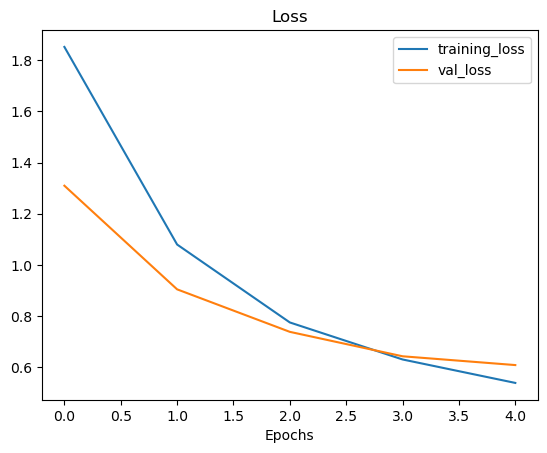

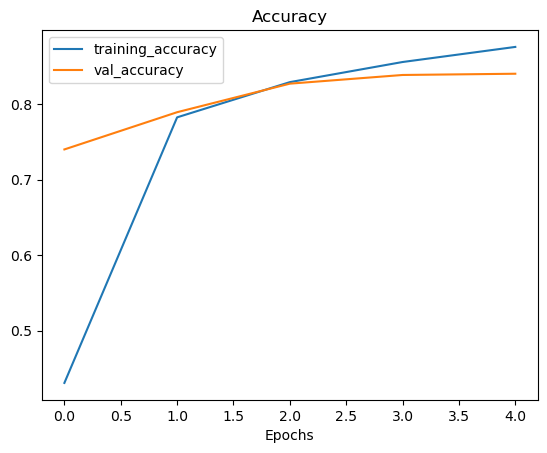

In [11]:
plot_loss_curves(history=history_10_percent)

In [12]:
#008 Getting a feature vector from our trained model
#demostrate GlobalAvgPoolingLayer2D
input_shape = (1,4,4,3)
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor :\n {input_tensor}\n")

#pass tensor through GlobalAvgPoolingLayer2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled randon tensor:\n {global_average_pooled_tensor}\n")

# check shape of tensors
print(f"shape of input tensor: {input_tensor.shape}")
print(f"shape of Global Average Pooled 2D tensor: {global_average_pooled_tensor.shape}")

Random input tensor :
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooled randon tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

shape of input tensor: (1, 4, 4, 3)
shape of Global Average Pooled 2D tensor: (1, 3)


In [13]:
# replicating the layer
tf.reduce_mean(input_tensor,axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [14]:
#009 Drilling into the concept of a feature vector (a learned representation)
#010 Downloading and preparing the data for Model 1 (1 percent of training data)
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [15]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent\test'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\sushi'

In [16]:
import tensorflow as tf
IMG_SIZE=(224,224)
BATCH_SIZE = 32
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,label_mode='categorical',image_size=IMG_SIZE,batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,label_mode='categorical',image_size=IMG_SIZE,batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [17]:
#011 Building a data augmentation layer to use inside our model

# data augmentation in preporocessing layers only turns on during training
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
    #tf.keras.layers.experimental.preprocessing.Rescaling(1./255) #ResNet50V2 needs this but efficientnet has it
],name="data_augmentation")

(-0.5, 549.5, 537.5, -0.5)

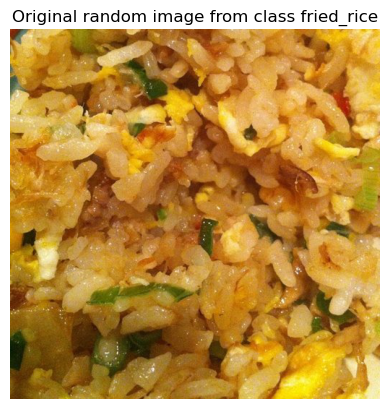

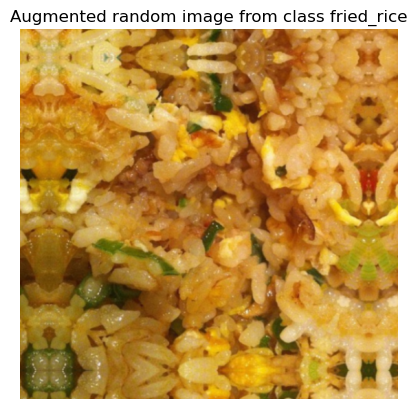

In [18]:
#013 Visualizing what happens when images pass through our data augmentation layer
#visualize our data augmentation layer
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/"+target_class
random_image = random.choice(os.listdir((target_dir)))
random_image_path = target_dir+"/"+random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class {target_class}")
plt.axis(False)

#Now augment this image and plot
augmented_img = data_augmentation(tf.expand_dims(img,axis=0),training=True)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented random image from class {target_class}")
plt.axis(False)

In [19]:
#014 Building Model 1 (with a data augmentation layer and 1% of training data)
#Model1 : Feture extraction transfer learning on 1% of data with data augmentation
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=input_shape,name="input_layer")
x=data_augmentation(inputs)

x = base_model(x,training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)
model_1 = tf.keras.Model(inputs,outputs)

#compile the model
model_1.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics = ["accuracy"])

history_1_percent = model_1.fit(train_data_1_percent,epochs=5,steps_per_epoch=len(train_data_1_percent),validation_data=test_data,validation_steps=int(0.25*len(test_data)),callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20240201-125122
Epoch 1/5
3/3 [==============================] - 25s 3s/step - loss: 2.2234 - accuracy: 0.1714 - val_loss: 2.1663 - val_accuracy: 0.2155
Epoch 2/5
3/3 [==============================] - 3s 1s/step - loss: 1.9920 - accuracy: 0.3714 - val_loss: 2.0320 - val_accuracy: 0.3158
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 1.7739 - accuracy: 0.5143 - val_loss: 1.9287 - val_accuracy: 0.4260
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.6130 - accuracy: 0.6143 - val_loss: 1.8230 - val_accuracy: 0.5099
Epoch 5/5
3/3 [==============================] - 2s 1s/step - loss: 1.4875 - accuracy: 0.7429 - val_loss: 1.7163 - val_accuracy: 0.5724


In [20]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [21]:
#Evaluate on full image dataset
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 6s 76ms/step - loss: 1.7459 - accuracy: 0.5348


[1.7459304332733154, 0.5347999930381775]

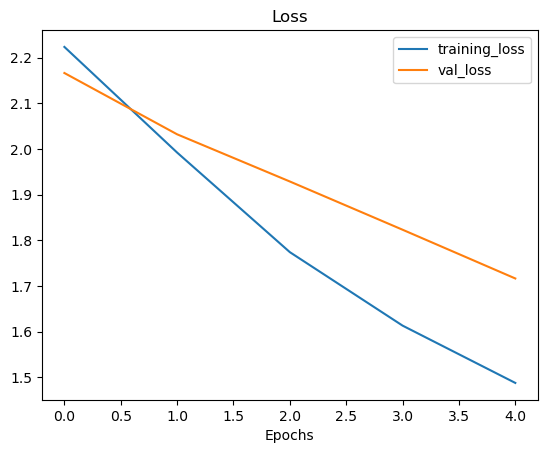

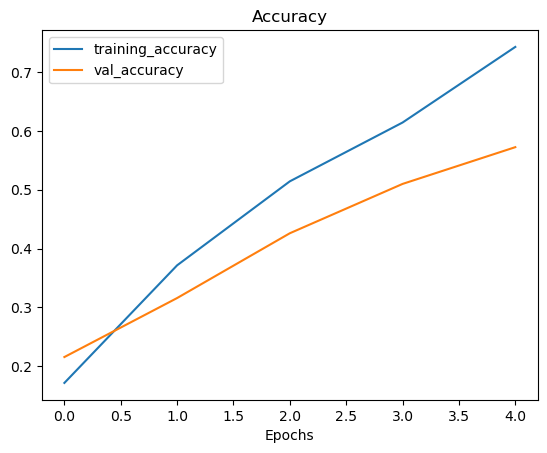

In [22]:
plot_loss_curves(history_1_percent)

In [23]:
#015 Building Model 2 (with a data augmentation layer and 10% of training data)
# Model 2 : feature extraction transfer learning with 10% data
train_dir_10_percent = "10_food_classes_10_percent/train"
teat_dir = "10_food_classes_10_percent/test"


In [24]:
import tensorflow as tf
IMG_SIZE = (224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,label_mode="categorical",image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,label_mode="categorical",image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [25]:
from keras import layers
from keras.layers import preprocessing
from keras.models import Sequential

data_augmentation = Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
],name = "data_augmentation")

input_shape = (224,224,3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape,name="input_layer")
x = data_augmentation(inputs)
x = base_model(x,training=False)
x = layers.GlobalAveragePooling2D(name="Global_averagre_pooling_2D")(x)
outputs = layers.Dense(10,activation="softmax",name= "output_layer")(x)
model_2 = tf.keras.Model(inputs,outputs)

model_2.compile(loss = "categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


In [26]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 Global_averagre_pooling_2D   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [27]:
#016 Creating a ModelCheckpoint to save our model's weights during training
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,save_best_only=False,save_freq="epoch",verbose=1)

In [28]:
#017 Fitting and evaluating Model 2 (and saving its weights using ModelCheckpoint)
#Fit model 2 passing in the model checkpoint callback
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,epochs=initial_epochs,validation_data=test_data,validation_steps=int(0.25*len(test_data)),callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="10_percent_data_aug"),checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20240201-125208
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9612 - accuracy: 0.3627
Epoch 1: saving model to ten_percent_model_checkpoints_weights\checkpoint.ckpt
24/24 [==============================] - 17s 427ms/step - loss: 1.9612 - accuracy: 0.3627 - val_loss: 1.3890 - val_accuracy: 0.7122
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2663 - accuracy: 0.7280
Epoch 2: saving model to ten_percent_model_checkpoints_weights\checkpoint.ckpt
24/24 [==============================] - 7s 297ms/step - loss: 1.2663 - accuracy: 0.7280 - val_loss: 0.9733 - val_accuracy: 0.7796
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9970 - accuracy: 0.7653
Epoch 3: saving model to ten_percent_model_checkpoints_weights\checkpoint.ckpt
24/24 [==============================] - 7s 274ms/step - loss: 0.9970 - accuracy: 0.7653 - val_loss: 0.7669 - val_accuracy: 0.8174
Epo

In [29]:
model_0.evaluate(test_data)

79/79 [==============================] - 6s 76ms/step - loss: 0.5523 - accuracy: 0.8656


[0.5523297786712646, 0.8655999898910522]

In [30]:
results_10_percent_data_aug = model_2.evaluate(test_data)

79/79 [==============================] - 6s 76ms/step - loss: 0.6113 - accuracy: 0.8440


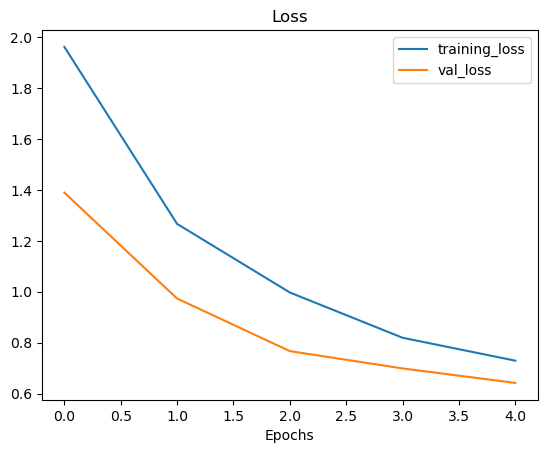

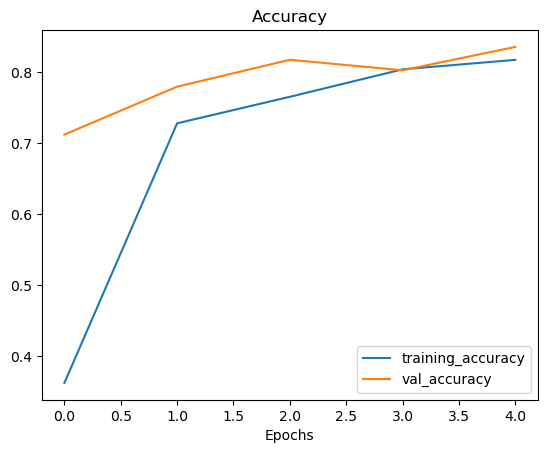

In [31]:
plot_loss_curves(history_10_percent_data_aug)

In [32]:
#018 Loading and comparing saved weights to our existing trained Model 2
#Loading in checkpoint weights
model_2.load_weights(checkpoint_path)

In [33]:
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 6s 76ms/step - loss: 0.6113 - accuracy: 0.8440


In [34]:
#if it matches the earlier the loading works
results_10_percent_data_aug

[0.6113266944885254, 0.843999981880188]

In [35]:
loaded_weights_model_results

[0.6113264560699463, 0.843999981880188]

In [36]:
#Althought the values are same it is a precision change
import numpy as np
np.isclose(np.array(results_10_percent_data_aug),np.array(loaded_weights_model_results))

array([ True,  True])

In [37]:
#019 Preparing Model 3 (our first fine-tuned model)
#fine tuning an existing model on 10 Percent of training data
# fine tuning usually works best after training a feature extraction model for a few epochs with large amount of custom data

In [38]:
#model_3 is fine tune version of model_2

model_2.layers
for layers in model_2.layers:
    print(layers,layers.trainable)

<keras.engine.input_layer.InputLayer object at 0x00000235ADECC160> True
<keras.engine.sequential.Sequential object at 0x00000234FFED2160> True
<keras.engine.functional.Functional object at 0x00000235AE01D3A0> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x0000023527750520> True
<keras.layers.core.dense.Dense object at 0x00000235AE050A90> True


In [39]:
for i,layer in enumerate(model_2.layers[2].layers):
    print(i,layer.name,layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [40]:
len(model_2.layers[2].non_trainable_variables)

312

In [41]:
#To begin fine tuning , let's start by setting last 10 layers of our base_model.trainable = True
base_model.trainable = True

for layer in base_model.layers[:-10]:
    layer.trainable = False

# we generally reduce the learning rate by 10X if we are retraining a trained model(fine tuning) layers, as it has already learned on previous data, we just want to learn it small

model_2.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(lr=0.00001),metrics=['accuracy'])

#Freeze all layers except for last 10



In [42]:
for layer_number,layer in enumerate(model_2.layers[2].layers):
    print(layer_number,layer.name,layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [43]:
print(len(model_2.trainable_variables))

12


In [44]:
 #Fine Tune for another 5 epochs
 fine_tune_epochs = initial_epochs + 5

 #Refit the model (same as model_2 except more trainable layers)
 history_fine_10_per_data_aug = model_2.fit(train_data_10_percent,
                                            epochs=fine_tune_epochs,
                                            validation_data=test_data,
                                            validation_steps=int(0.25 * len(test_data)),
                                            initial_epoch=history_10_percent_data_aug.epoch[-1],#start training from previus last epoch
                                            callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="10_percent_fine_tune_last_10")])



Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20240201-125312
Epoch 5/10
24/24 [==============================] - 14s 311ms/step - loss: 0.6648 - accuracy: 0.8293 - val_loss: 0.5579 - val_accuracy: 0.8553
Epoch 6/10
24/24 [==============================] - 6s 270ms/step - loss: 0.6294 - accuracy: 0.8320 - val_loss: 0.5429 - val_accuracy: 0.8520
Epoch 7/10
24/24 [==============================] - 6s 269ms/step - loss: 0.6074 - accuracy: 0.8453 - val_loss: 0.5474 - val_accuracy: 0.8470
Epoch 8/10
24/24 [==============================] - 7s 285ms/step - loss: 0.6092 - accuracy: 0.8560 - val_loss: 0.5399 - val_accuracy: 0.8405
Epoch 9/10
24/24 [==============================] - 7s 272ms/step - loss: 0.6173 - accuracy: 0.8320 - val_loss: 0.5258 - val_accuracy: 0.8487
Epoch 10/10
24/24 [==============================] - 7s 275ms/step - loss: 0.5737 - accuracy: 0.8493 - val_loss: 0.5177 - val_accuracy: 0.8405


In [45]:
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 6s 76ms/step - loss: 0.5142 - accuracy: 0.8524


In [46]:
results_fine_tune_10_percent

[0.5142101645469666, 0.852400004863739]

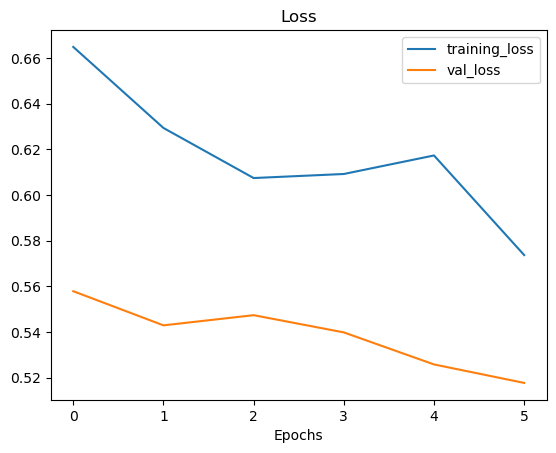

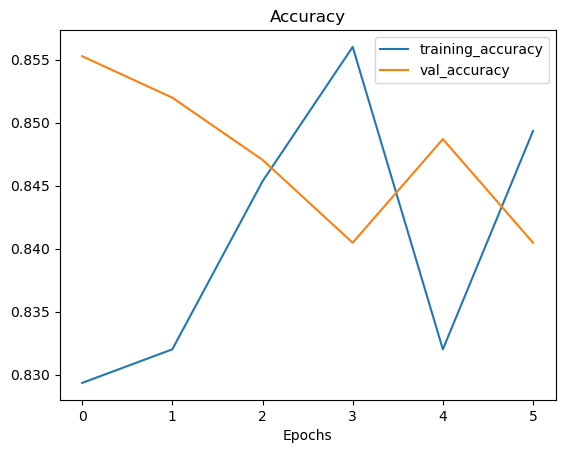

In [47]:
#021 Comparing our model's results before and after fine-tuning
plot_loss_curves(history_fine_10_per_data_aug)

In [48]:
def compare_historys(original_history,new_history,initial_epoch=5):
    acc = original_history.history['accuracy']
    loss = original_history.history['loss']

    val_acc = original_history.history['val_accuracy']
    val_loss = original_history.history['val_loss']

    total_acc = acc +new_history.history["accuracy"]
    total_loss = loss + new_history.history['loss']

    total_val_acc = val_acc + new_history.history['val_accuracy']
    total_val_loss = val_loss+new_history.history['val_loss']


    #make plots for acc
    plt.figure(figsize=(8,8))
    plt.subplot(2,1,1)
    plt.plot(total_acc,label="Training Accuracy")
    plt.plot(total_val_acc,label="Val Accuracy")
    plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim(),label="Start Fine Tuning")
    plt.legend(loc="lower right")
    plt.title("Training and Validation accuracy")

    #make plots for loss
    plt.figure(figsize=(8,8))
    plt.subplot(2,1,2)
    plt.plot(total_loss,label="Training Loss")
    plt.plot(total_val_loss,label="Val Loss")
    plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim(),label="Start Fine Tuning")
    plt.legend(loc="upper right")
    plt.title("Training and Validation Loss")

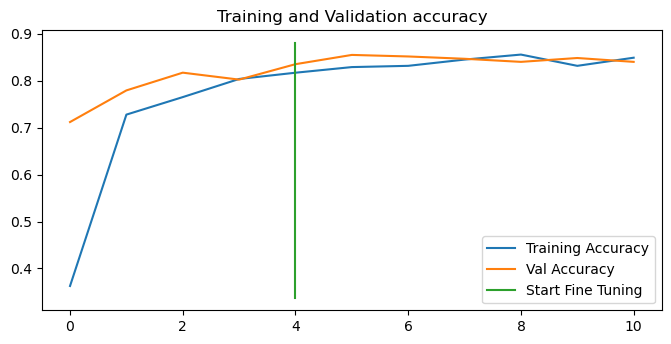

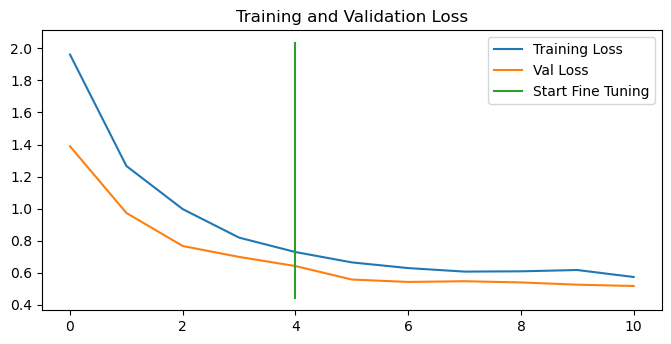

In [49]:
compare_historys(history_10_percent_data_aug,history_fine_10_per_data_aug,initial_epoch=5)

In [50]:
#022 Downloading and preparing data for our biggest experiment yet (Model 4)
#Fine_tuning an existing model on all of the data
train_dir_all_data = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [51]:
# Images count
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [52]:
import tensorflow as tf
IMG_SIZE = (224,224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,label_mode="categorical",image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,label_mode="categorical",image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [54]:
#023 Preparing our final modelling experiment (Model 4)
model_2.evaluate(test_data)

79/79 [==============================] - 6s 76ms/step - loss: 0.5142 - accuracy: 0.8524


[0.5142105221748352, 0.852400004863739]

In [55]:
results_fine_tune_10_percent

[0.5142101645469666, 0.852400004863739]

In [56]:
model_2.load_weights(checkpoint_path)

In [57]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 76ms/step - loss: 0.6113 - accuracy: 0.8440


[0.6113266348838806, 0.843999981880188]

In [58]:
results_10_percent_data_aug

[0.6113266944885254, 0.843999981880188]

In [59]:
# check which layers are tunable in the whole model
for layer_number,layer in enumerate(model_2.layers):
    print(layer_number,layer.name,layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 Global_averagre_pooling_2D True
4 output_layer True


In [60]:
for layer_number,layer in enumerate(model_2.layers[2].layers):
    print(layer_number,layer.name,layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [61]:
#024 Fine-tuning Model 4 on 100% of the training data and evaluating its results
#Compile
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics = ["accuracy"])

In [62]:
fine_tune_epochs = initial_epochs + 5
history_fine_10_class_full = model_2.fit(train_data_10_classes_full,
                                         epochs=fine_tune_epochs,
                                         validation_data=test_data,
                                         validation_steps=int(0.25*len(test_data)),
                                         initial_epoch=history_10_percent_data_aug.epoch[-1],
                                         callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="full_10_class_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_10_class_fine_tune_last_10/20240201-133349
Epoch 5/10
235/235 [==============================] - 56s 213ms/step - loss: 0.6497 - accuracy: 0.7919 - val_loss: 0.3287 - val_accuracy: 0.8964
Epoch 6/10
235/235 [==============================] - 49s 208ms/step - loss: 0.5226 - accuracy: 0.8303 - val_loss: 0.2672 - val_accuracy: 0.9178
Epoch 7/10
235/235 [==============================] - 49s 209ms/step - loss: 0.4505 - accuracy: 0.8580 - val_loss: 0.2421 - val_accuracy: 0.9260
Epoch 8/10
235/235 [==============================] - 49s 209ms/step - loss: 0.4170 - accuracy: 0.8627 - val_loss: 0.2284 - val_accuracy: 0.9211
Epoch 9/10
235/235 [==============================] - 49s 210ms/step - loss: 0.3804 - accuracy: 0.8792 - val_loss: 0.2432 - val_accuracy: 0.9194
Epoch 10/10
235/235 [==============================] - 49s 209ms/step - loss: 0.3574 - accuracy: 0.8844 - val_loss: 0.2271 - val_accuracy: 0.9309


In [63]:
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 6s 76ms/step - loss: 0.2827 - accuracy: 0.9128


[0.28267091512680054, 0.9128000140190125]

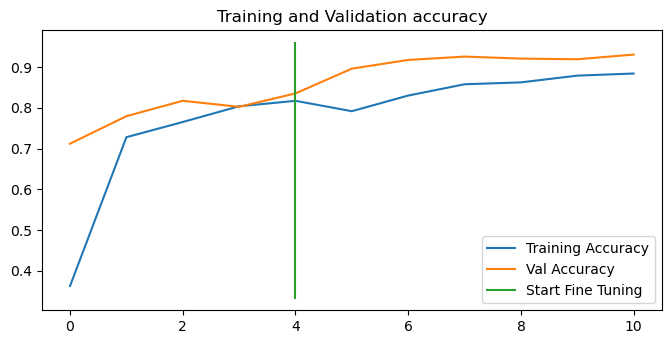

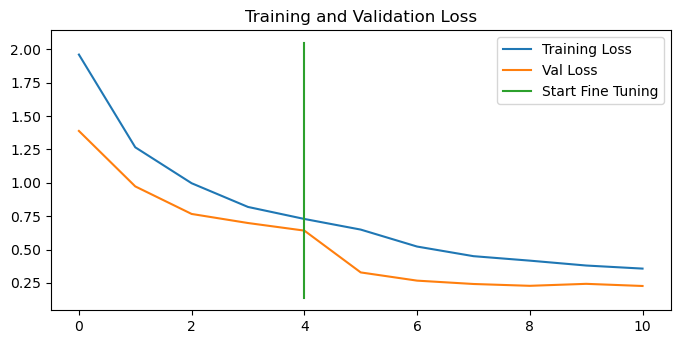

In [64]:
#025 Comparing our modelling experiment results in TensorBoard
compare_historys(original_history=history_10_percent_data_aug,new_history=history_fine_10_class_full,initial_epoch=5)

In [65]:
#025 Comparing our modelling experiment results in TensorBoard
def launchTensorBoard():
    import os
    os.system('tensorboard  --logdir .\TransferLearning --name "Transfer Leraning Experiments with 10 Food101 Classes"' )
    return

import threading
t = threading.Thread(target=launchTensorBoard, args=([]))
t.start()